In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PSDV_Assignment_3_Data/Data.csv')
funding = pd.read_csv('/content/drive/MyDrive/PSDV_Assignment_3_Data/NCAP_Funding.csv')
st_df = pd.read_csv('/content/drive/MyDrive/PSDV_Assignment_3_Data/State_data.csv')

In [ ]:
df = df.rename(columns={'state':'State', 'address': 'Address', 'station': 'Station', 'city': 'City', 'latitude': 'Latitude', 'longitude': 'Longitude'})
df["Timestamp"] = pd.to_datetime(df['Timestamp'])

In [ ]:
df

,Timestamp,Station,PM2.5,PM10,Address,City,Latitude,Longitude,State
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


# **Spatial aggregation**


1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [ ]:
df.groupby('State')['PM2.5'].mean().sort_values().tail(1)

,PM2.5
State,
Delhi,104.100918


2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [ ]:
df_ = df[df['Timestamp'].dt.year==2023]
func = lambda x: 0 if x.sum()==0 else 1
answe = df_.groupby(['State','Timestamp'])['PM2.5'].mean()
ans = answe.reset_index()
ans.groupby('State')['PM2.5'].apply(lambda x:(x>300).sum()).sort_values(ascending=False).head(1)

,PM2.5
State,
Delhi,11


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)


In [ ]:
yr = ((df['Timestamp'].dt.year==2023))
t = df[yr].groupby(['State','Timestamp'])['PM2.5'].std()
# df[yr].groupby('State')['PM2.5'].mean().sort_values()
t = t.reset_index()
t.sort_values(by='PM2.5',ascending=False).head(1)

,State,Timestamp,PM2.5
5177,Madhya Pradesh,2023-03-09,221.281719


4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?


In [ ]:
yr = (((df['Timestamp'].dt.year==2020)|(df['Timestamp'].dt.year==2021)) & (df['PM2.5'].notna()))
df[yr].groupby('State')['PM2.5'].mean().sort_values().head(1)

,PM2.5
State,
Mizoram,14.32335


# **Temporal Aggregation**

In [101]:
data = df.set_index('Timestamp')
ncap = funding
state = st_df

1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [103]:
flt = ((data.index.month==8) & (data.index.year==2020))
station = data[flt][data[flt]['PM2.5'] == data[flt]['PM2.5'].max()]['Station'].unique()[0]
station

'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'

2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations **Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB**. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [105]:
winter = ((data.index.month==12) | (data.index.month<=2))
summer = ((data.index.month>=3) | (data.index.month<=5))
monsoon= ((data.index.month>=6) | (data.index.month<=9))
st_flt = (data['Station']==station)
yr_flt = (data.index.year==2018)

w_mean = data[(winter & st_flt & yr_flt)]['PM2.5'].mean()
s_mean = data[(summer & st_flt & yr_flt)]['PM2.5'].mean()
m_mean = data[(monsoon & st_flt & yr_flt)]['PM2.5'].mean()
print(f'Winter Mean :{w_mean}\nSummer Mean :{s_mean}\nMonsoon Mean :{m_mean}')

Winter Mean :67.4923443634478
Summer Mean :52.72937695236139
Monsoon Mean :52.72937695236139


In [107]:
#THOUGHT QUESTION
data[st_flt]['State'].unique()[0]

'Karnataka'

In [ ]:
'''
It make sense for winter to be more polluted due to higher consumption of various energy sources for heating
that in their consumption/manufacture lead to the production of pollutants
'''

3. Compare the average PM2.5 levels during weekends and weekdays for the station **Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB** over the year 2021. Create a plot to show these trends Steps:

a. Calculate the monthly average PM2.5 for weekdays and weekends separately

b. X-axis: Months (January to December).

c. Y-axis: Average PM2.5 levels.

d. Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.



In [108]:
func = lambda x: x.iloc[0].weekday()
ser = pd.DataFrame(data.index).apply(func,axis=1)

In [109]:
re = data.reset_index()
re['Day'] = ser
re.set_index('Timestamp',inplace=True)

weekday = (re['Day']<=5)
weekend = (re['Day']>=6)
yr = (re.index.year==2021)

re['Month'] = re.index.month

In [110]:
weekdays = re[(weekday&yr)].groupby('Month')['PM2.5'].mean()
weekends = re[(weekend&yr)].groupby('Month')['PM2.5'].mean()

In [111]:
months_of_year = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

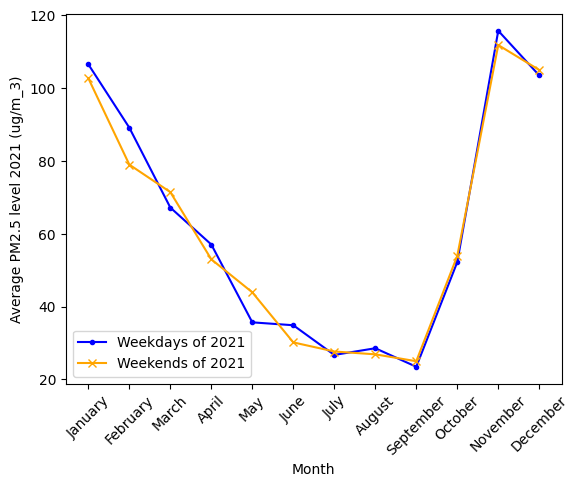

In [112]:
weekdays.plot(kind='line',marker='.',color='blue',label='Weekdays of 2021')
weekends.plot(kind='line',marker='x',color='orange',label='Weekends of 2021')
plt.xticks(ticks=range(1,13),labels=months_of_year,rotation=45)
plt.ylabel("Average PM2.5 level 2021 (ug/m_3)")
plt.legend()

# **Spatio-temporal aggregation**

1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [ ]:
df["Timestamp"] = pd.to_datetime(df['Timestamp'])
df_2022 = df[df["Timestamp"].dt.year == 2022].copy()
df_2022["Month"] = df_2022["Timestamp"].dt.month
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]
summer_avg_2022 = df_2022[df_2022["Month"].isin(summer_months)].groupby("State")["PM2.5"].mean()
monsoon_avg_2022 = df_2022[df_2022["Month"].isin(monsoon_months)].groupby("State")["PM2.5"].mean()
pm25_change_2022 = pd.DataFrame({"Summer_Avg": summer_avg_2022, "Monsoon_Avg": monsoon_avg_2022})
pm25_change_2022["Percentage_Change"] = ((pm25_change_2022["Monsoon_Avg"] - pm25_change_2022["Summer_Avg"]) / pm25_change_2022["Summer_Avg"]) * 100
most_difference_state_2022 = pm25_change_2022["Percentage_Change"].abs().idxmax()
most_difference_value_2022 = pm25_change_2022.loc[most_difference_state_2022, "Percentage_Change"]

print("PM2.5 Percentage Change by State:")
display(pm25_change_2022)
print(f"\nState with the Most Difference: {most_difference_state_2022}")
print(f"Percentage Change(negative value indicates decrease): {most_difference_value_2022:.3f}%")

PM2.5 Percentage Change by State:


,Summer_Avg,Monsoon_Avg,Percentage_Change
State,,,
Andhra Pradesh,30.128540,19.355510,-35.756894
Arunachal Pradesh,32.116292,15.069892,-53.077110
Assam,56.337647,21.872292,-61.176419
Bihar,75.834868,35.642356,-53.000042
Chandigarh,59.695914,32.758585,-45.124242
Chhattisgarh,22.321561,19.871696,-10.975330
Delhi,95.667628,42.769572,-55.293579
Gujarat,65.113078,35.852728,-44.937747
Haryana,81.727661,41.922458,-48.704688



State with the Most Difference: Assam
Percentage Change(negative value indicates decrease): -61.176%


2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


,Year,Season,Avg_PM2.5
0,2017,Winter,168.601736
1,2017,Summer,98.525562
2,2017,Monsoon,52.058519
3,2018,Winter,189.692843
4,2018,Summer,92.307981
5,2018,Monsoon,51.366940
6,2019,Winter,179.034521
7,2019,Summer,84.982546
8,2019,Monsoon,46.200330
9,2020,Winter,158.383736


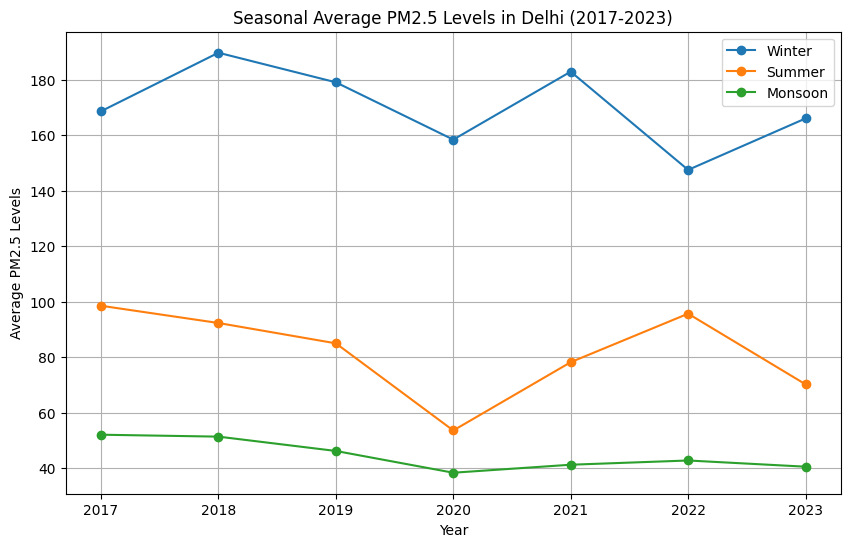


-Winter has the worst air quality, while monsoon has the cleanest air.
-A sharp dip in 2020 across all seasons, likely due to lockdowns reducing emissions.
-Summer pollution fluctuates, possibly influenced by dust storms and varying wind speeds.


In [ ]:
df_delhi = df[df["State"] == "Delhi"]
seasons = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}
seasonal_avg = {"Year": [], "Season": [], "Avg_PM2.5": []}

for year in range(2017, 2024):
    df_year = df_delhi[df_delhi["Timestamp"].dt.year == year]

    for season, months in seasons.items():
        df_season = df_year[df_year["Timestamp"].dt.month.isin(months)]
        avg_pm25 = df_season["PM2.5"].mean()
        seasonal_avg["Year"].append(year)
        seasonal_avg["Season"].append(season)
        seasonal_avg["Avg_PM2.5"].append(avg_pm25)

seasonal_df = pd.DataFrame(seasonal_avg)
display(seasonal_df)
plt.figure(figsize=(10, 6))
for season in ["Winter", "Summer", "Monsoon"]:
    df_season = seasonal_df[seasonal_df["Season"] == season]
    plt.plot(df_season["Year"], df_season["Avg_PM2.5"], marker='o', label=season)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Seasonal Average PM2.5 Levels in Delhi (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()
print('''
-Winter has the worst air quality, while monsoon has the cleanest air.
-A sharp dip in 2020 across all seasons, likely due to lockdowns reducing emissions.
-Summer pollution fluctuates, possibly influenced by dust storms and varying wind speeds.''')

3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


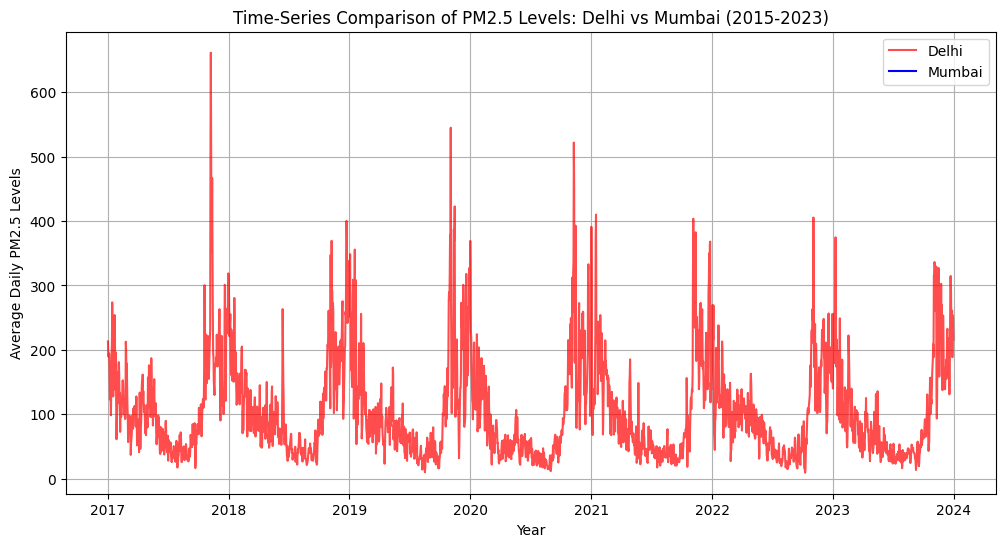

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

df_filtered = df[
    (df["State"].isin(["Delhi", "Mumbai"])) &
    (df["Timestamp"].dt.year.between(2015, 2023))
]
df_daily_avg = df_filtered.groupby([df_filtered["Timestamp"].dt.date, "State"])["PM2.5"].mean().reset_index()
df_daily_avg["Timestamp"] = pd.to_datetime(df_daily_avg["Timestamp"])
df_delhi = df_daily_avg[df_daily_avg["State"] == "Delhi"]
df_mumbai = df_daily_avg[df_daily_avg["State"] == "Mumbai"]
plt.figure(figsize=(12, 6))
plt.plot(df_delhi["Timestamp"], df_delhi["PM2.5"], label="Delhi", color="red", alpha=0.7)
plt.plot(df_mumbai["Timestamp"], df_mumbai["PM2.5"], label="Mumbai", color="blue", alpha=1)

plt.xlabel("Year")
plt.ylabel("Average Daily PM2.5 Levels")
plt.title("Time-Series Comparison of PM2.5 Levels: Delhi vs Mumbai (2015-2023)")
plt.legend()
plt.grid(True)
plt.show()


# **Population-Based**

1. Which state in India has the highest number of monitoring stations relative to its population?

In [ ]:
station_counts = df.groupby("State")["Station"].nunique().reset_index()
station_counts.columns = ["State", "Number of Stations"]

population_df = st_df.loc[:,['State','Population']]
station_counts = pd.merge(station_counts,population_df,on='State',how='left')
station_counts = station_counts.loc[:, ['State', 'Population', 'Number of Stations']]
station_counts['Stations w.r.t Population'] = station_counts['Population']/station_counts['Number of Stations']

display(station_counts)
max_index = station_counts['Stations w.r.t Population'].idxmax()
print(f"\nThe state witn highest number of monitoring stations relative to its population is {station_counts.iloc[max_index,0]} with {station_counts.iloc[max_index,-1]}.")

,State,Population,Number of Stations,Stations w.r.t Population
0,Andhra Pradesh,49577103,13,3.813623e+06
1,Arunachal Pradesh,1383727,1,1.383727e+06
2,Assam,31205576,9,3.467286e+06
3,Bihar,104099452,36,2.891651e+06
4,Chandigarh,1055450,3,3.518167e+05
5,Chhattisgarh,25545198,14,1.824657e+06
6,Delhi,16787941,40,4.196985e+05
7,Gujarat,60439692,17,3.555276e+06
8,Haryana,25351462,30,8.450487e+05
9,Himachal Pradesh,6864602,1,6.864602e+06



The state witn highest number of monitoring stations relative to its population is Jammu and Kashmir with 12267032.0.



2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

,State,PM2.5,Population,Per capita PM2.5
0,Delhi,1.384286e+06,16787941,0.082457
1,Chandigarh,6.369187e+04,1055450,0.060346
2,Haryana,7.170170e+05,25351462,0.028283
3,Rajasthan,6.765094e+05,68548437,0.009869
4,Tripura,3.419970e+04,3673917,0.009309
5,Bihar,9.255538e+05,104099452,0.008891
6,Maharashtra,9.505283e+05,112374333,0.008459
7,Sikkim,4.597679e+03,610577,0.007530
8,Puducherry,8.864418e+03,1247953,0.007103
9,Manipur,1.641014e+04,2570390,0.006384


,State,PM2.5,Population,Per capita PM2.5
0,Delhi,1.384286e+06,16787941,0.082457
1,Chandigarh,6.369187e+04,1055450,0.060346
2,Haryana,7.170170e+05,25351462,0.028283
3,Rajasthan,6.765094e+05,68548437,0.009869
4,Tripura,3.419970e+04,3673917,0.009309


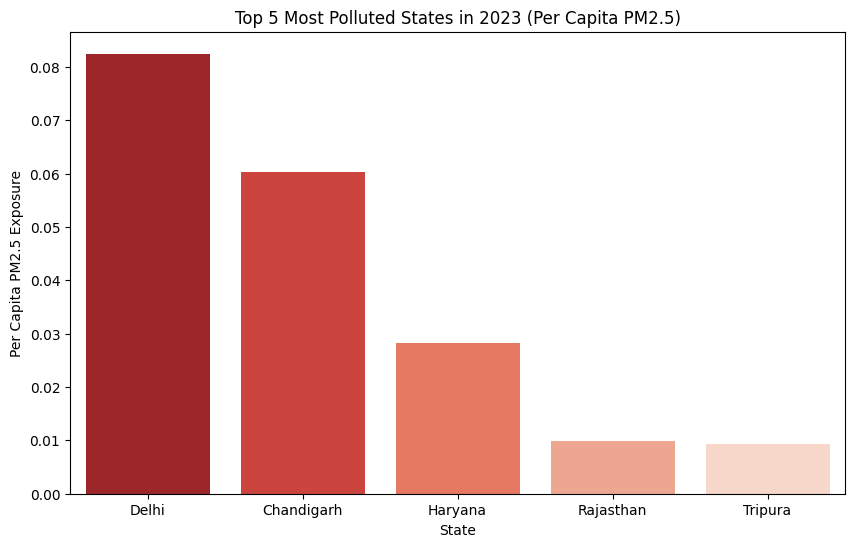

In [ ]:
df["Timestamp"] = pd.to_datetime(df['Timestamp'])
df_2023=df[df['Timestamp'].dt.year==2023].copy()

pm_2023 = df_2023.groupby('State')['PM2.5'].sum().reset_index()
population_df = st_df.loc[:,['State','Population']]

pm_2023 = pd.merge(pm_2023,population_df,on='State',how='left')
pm_2023['Per capita PM2.5'] = (pm_2023['PM2.5']/pm_2023['Population'])
pm_2023_sorted = pm_2023.sort_values(by="Per capita PM2.5", ascending=False).reset_index(drop=True)
display(pm_2023_sorted)
pm_2023_top = pm_2023_sorted.head(5)
display(pm_2023_top)
plt.figure(figsize=(10, 6))
sns.barplot(x="State", y="Per capita PM2.5", hue="State", legend=False, data=pm_2023_top, palette="Reds_r")
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States in 2023 (Per Capita PM2.5)")
plt.show()

3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?

a. X-axis: Population density (people per square kilometer).

b. Y-axis: Average PM2.5 concentration.

c. Use a scatter plot to show the relationship, where each point represents a state.


,State,PM2.5,Population Density
0,Andhra Pradesh,35.049347,304.200663
1,Arunachal Pradesh,22.674513,16.523495
2,Assam,57.962372,397.837477
3,Bihar,76.918759,1105.523953
4,Chandigarh,56.666803,9258.333333
5,Chhattisgarh,28.761571,188.954953
6,Delhi,104.100918,11312.628706
7,Gujarat,52.462657,308.328021
8,Haryana,72.371070,573.406813
9,Himachal Pradesh,62.516878,123.302175


Text(0.5, 1.0, 'Relationship between Population Density and Average PM2.5 Concentration for each state')

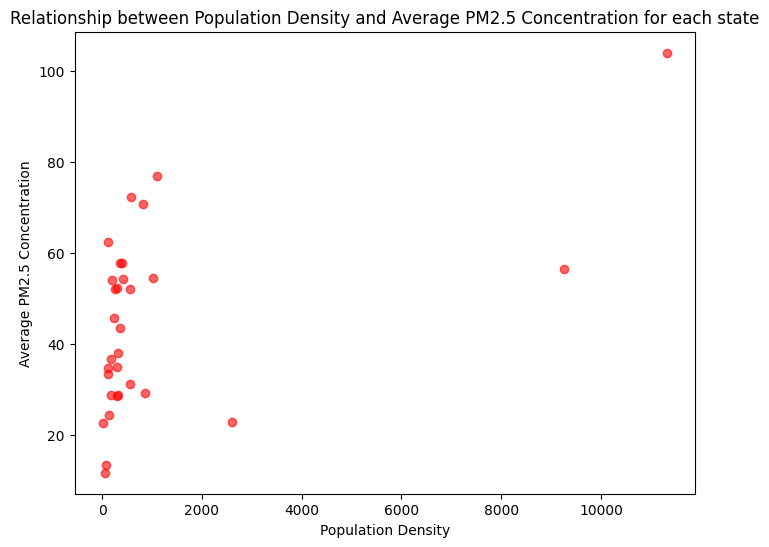

In [ ]:
df1 = st_df.copy()
df1['Population Density'] = df1['Population']/df1['Area (km2)']
df1 = df1.drop(['Population','Area (km2)'], axis=1)
df2 = df.groupby('State')['PM2.5'].mean()

final_df = pd.merge(df2, df1, on="State", how='left')
display(final_df)
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(final_df['Population Density'], final_df['PM2.5'], color = 'red', alpha = 0.6)
ax.set_xlabel('Population Density')
ax.set_ylabel('Average PM2.5 Concentration')
ax.set_title("Relationship between Population Density and Average PM2.5 Concentration for each state")

# **Area Based**

1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

a. X-axis: States.

b. Y-axis: PM2.5 concentration per square kilometer.

c. Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


,State,PM2.5,Area (km2),PM2.5 per Area
0,Andhra Pradesh,5.605442e+05,162975,3.439449
1,Arunachal Pradesh,2.403498e+04,83743,0.287009
2,Assam,4.874056e+05,78438,6.213896
3,Bihar,3.499342e+06,94163,37.162601
4,Chandigarh,2.346006e+05,114,2057.899673
5,Chhattisgarh,2.884498e+05,135192,2.133631
6,Delhi,9.902912e+06,1484,6673.121359
7,Gujarat,1.164251e+06,196024,5.939330
8,Haryana,4.566397e+06,44212,103.284117
9,Himachal Pradesh,6.157913e+04,55673,1.106086


Text(0.5, 1.0, 'PM2.5 concentration per square kilometer for each state')

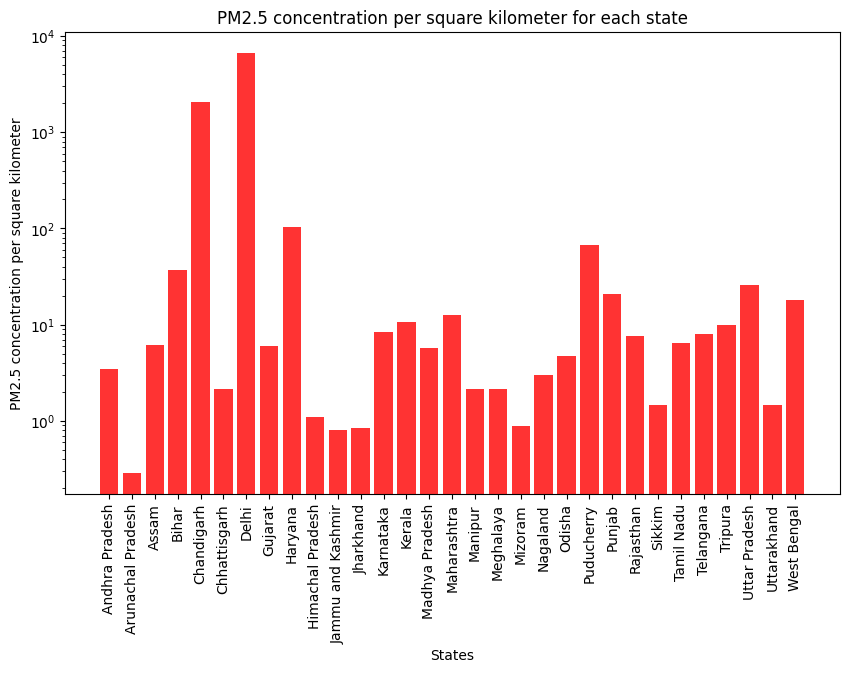

In [ ]:
df1 = df.groupby('State')['PM2.5'].sum()
df2 = st_df.copy()
df2 = df2.drop(['Population'],axis = 1)
df3 = pd.merge(df1, df2, on = 'State', how= 'left')
df3['PM2.5 per Area'] = df3['PM2.5']/df3['Area (km2)']
display(df3)
plt.figure(figsize=(10, 6))
plt.bar(df3['State'], df3['PM2.5 per Area'], color = 'red', alpha = 0.8)
plt.xticks(rotation=90)
plt.yscale("log")
plt.xlabel("States")
plt.ylabel("PM2.5 concentration per square kilometer")
plt.title("PM2.5 concentration per square kilometer for each state")

2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

,State,Number of Stations,Area (km2),Number of Stations per SqKm
0,Andhra Pradesh,13,162975,0.000080
1,Arunachal Pradesh,1,83743,0.000012
2,Assam,9,78438,0.000115
3,Bihar,36,94163,0.000382
4,Chandigarh,3,114,0.026316
5,Chhattisgarh,14,135192,0.000104
6,Delhi,40,1484,0.026954
7,Gujarat,17,196024,0.000087
8,Haryana,30,44212,0.000679
9,Himachal Pradesh,1,55673,0.000018


,State,Number of Stations,Area (km2),Number of Stations per SqKm
0,Delhi,40,1484,0.026954
1,Chandigarh,3,114,0.026316
2,Puducherry,1,479,0.002088
3,Haryana,30,44212,0.000679
4,Bihar,36,94163,0.000382
5,Maharashtra,97,307713,0.000315
6,Tamil Nadu,36,130058,0.000277
7,West Bengal,22,88752,0.000248
8,Uttar Pradesh,57,240928,0.000237
9,Kerala,9,38863,0.000232


Text(0.5, 1.0, 'Number of Monitoring Stations per square kilometer for each state')

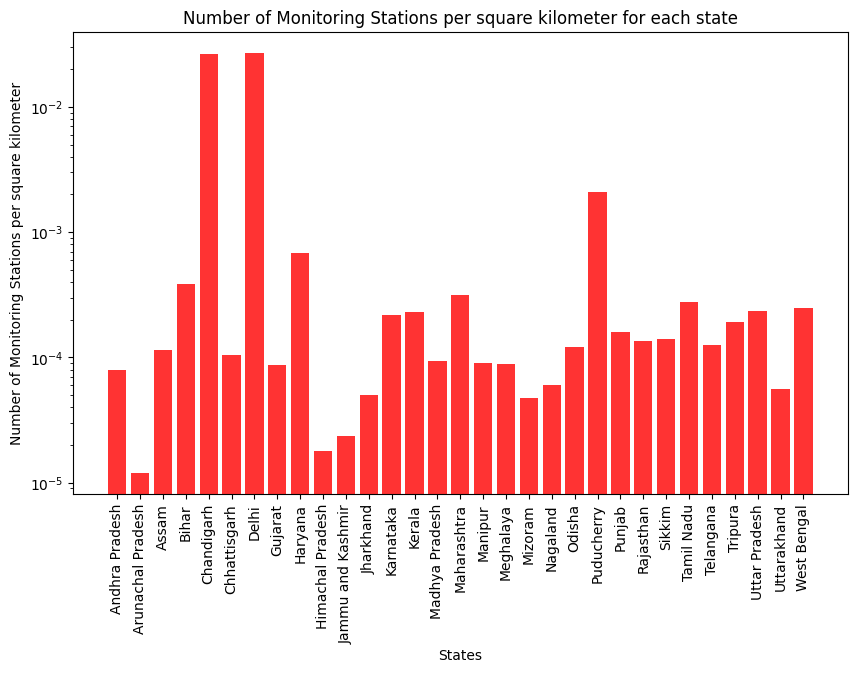

In [ ]:
station_per_area = station_counts.loc[:, ['State', 'Number of Stations']]
area = st_df.loc[:, ['State','Area (km2)']]
station_per_area = pd.merge(station_per_area, area, on='State', how = 'left')
station_per_area['Number of Stations per SqKm'] = station_per_area['Number of Stations']/ station_per_area['Area (km2)']
display(station_per_area)
station_per_area_sorted = station_per_area.sort_values(by='Number of Stations per SqKm', ascending=False).reset_index(drop=True)
station_per_area_top = station_per_area_sorted.head(5)
display(station_per_area_sorted)
plt.figure(figsize=(10, 6))
plt.bar(station_per_area['State'], station_per_area['Number of Stations per SqKm'], color = 'red', alpha = 0.8)
plt.xticks(rotation=90)
plt.yscale("log")
plt.xlabel("States")
plt.ylabel("Number of Monitoring Stations per square kilometer")
plt.title("Number of Monitoring Stations per square kilometer for each state")

3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


In [ ]:
df_2021 = df[df['Timestamp'].dt.year == 2021]
df_2021 = df_2021.loc[:, ['Timestamp', 'State', 'PM2.5']]
avg_pm25 = df_2021.groupby('State')['PM2.5'].mean().reset_index()
avg_pm25.rename(columns={'PM2.5': 'Avg PM2.5'}, inplace=True)
df1 = st_df.copy()
df1['Population Density'] = df1['Population']/df1['Area (km2)']
df1 = df1.drop(['Population','Area (km2)'], axis=1)
df_2021 = pd.merge(avg_pm25, df1, on = 'State', how = 'left')
display(df_2021)
display(df_2021[df_2021['State'].isin(['Maharashtra', 'Madhya Pradesh'])])
print(f"The average levels for Maharashtra and Madhya Pradesh over the year 2021 are "
      f"{df_2021.loc[df_2021['State'] == 'Maharashtra', 'Avg PM2.5'].values[0]:.3f} and "
      f"{df_2021.loc[df_2021['State'] == 'Madhya Pradesh', 'Avg PM2.5'].values[0]:.3f}.")
print()
print('''Impact of Population Density on Pollution:
  •Maharashtra's higher population density (365 people/km² vs. 235 people/km²) should theoretically lead to higher emissions from vehicles, industries, and human activities.
  However, the PM2.5 levels are nearly the same, indicating other factors at play, such as:
    -Maharashtra might have better infrastructure & emission regulations that offset the impact of higher population density.
    -Geography & Climate: Madhya Pradesh, being landlocked with fewer natural air purifiers (e.g., sea breeze in Mumbai), might experience longer PM2.5 retention in the atmosphere.
    -Industrial Contribution: Madhya Pradesh could have more open biomass burning, dust emissions, or weaker environmental policies contributing to pollution.
''')

,State,Avg PM2.5,Population Density
0,Andhra Pradesh,33.316491,304.200663
1,Arunachal Pradesh,14.751325,16.523495
2,Assam,61.017780,397.837477
3,Bihar,81.967836,1105.523953
4,Chandigarh,44.360885,9258.333333
5,Chhattisgarh,24.863968,188.954953
6,Delhi,105.401629,11312.628706
7,Gujarat,50.780194,308.328021
8,Haryana,75.320179,573.406813
9,Himachal Pradesh,NaN,123.302175


,State,Avg PM2.5,Population Density
14,Madhya Pradesh,47.095952,235.608557
15,Maharashtra,46.440044,365.192023


The average levels for Maharashtra and Madhya Pradesh over the year 2021 are 46.440 and 47.096.

Impact of Population Density on Pollution:
  •Maharashtra's higher population density (365 people/km² vs. 235 people/km²) should theoretically lead to higher emissions from vehicles, industries, and human activities.
  However, the PM2.5 levels are nearly the same, indicating other factors at play, such as:
    -Maharashtra might have better infrastructure & emission regulations that offset the impact of higher population density.
    -Geography & Climate: Madhya Pradesh, being landlocked with fewer natural air purifiers (e.g., sea breeze in Mumbai), might experience longer PM2.5 retention in the atmosphere.
    -Industrial Contribution: Madhya Pradesh could have more open biomass burning, dust emissions, or weaker environmental policies contributing to pollution.



In [ ]:
ncap = funding
data = df
state = st_df

In [ ]:
ncap.rename(columns={'Amount released during FY 2019-20':'20',
                     'Amount released during FY 2020-21':'21',
                     'Amount released during FY 2021-22':'22',
                     'Utilisation as on June 2022':"util",
                     },inplace=True)
ncap['21'].replace("-",np.nan,inplace=True)

<ipython-input-38-d928c01bd4d9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ncap['21'].replace("-",np.nan,inplace=True)


# **Funding Based**

1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [ ]:
flt = ncap['21'].notna()
res_1 = data['PM2.5'].groupby(flt).mean()
res_1 = res_1.reset_index()

res_1['21'] = ['Did Not Receive','Received']
res_1.set_index('21')

,PM2.5
21,
Did Not Receive,130.314479
Received,142.187876


2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

In [ ]:
import

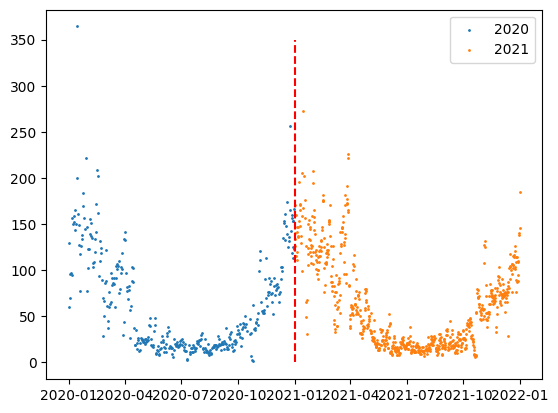

In [ ]:
fig, ax = plt.subplots()
dat = data.set_index('Timestamp')
yr_i20 = dat[(dat['State']=='Assam')&(dat.index.year==2020)]['PM2.5'].reset_index()
yr_i21 = dat[(dat['State']=='Assam')&(dat.index.year==2021)]['PM2.5'].reset_index()
ax.scatter(yr_i20['Timestamp'],yr_i20['PM2.5'],label='2020',s=1)
ax.scatter(yr_i21['Timestamp'],yr_i21['PM2.5'],label='2021',s=1)
ax.vlines(x=pd.to_datetime('2021-01-01',format='%Y-%m-%d'),ymin=0,ymax=350,color='red',linestyles='--')
ax.legend()
plt.show()

Padding

In [ ]:
ncap.rename(columns={'Total fund released':'total'},inplace=True)
state.rename(columns={'Area (km2)':'area_km2'},inplace=True)

In [ ]:
state_funds = ncap.groupby('State')['total'].sum()

In [ ]:
state.loc[19,'State'] = "Jammu & Kashmir"

3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


Text(0, 0.5, 'NCAP Funding in crores')

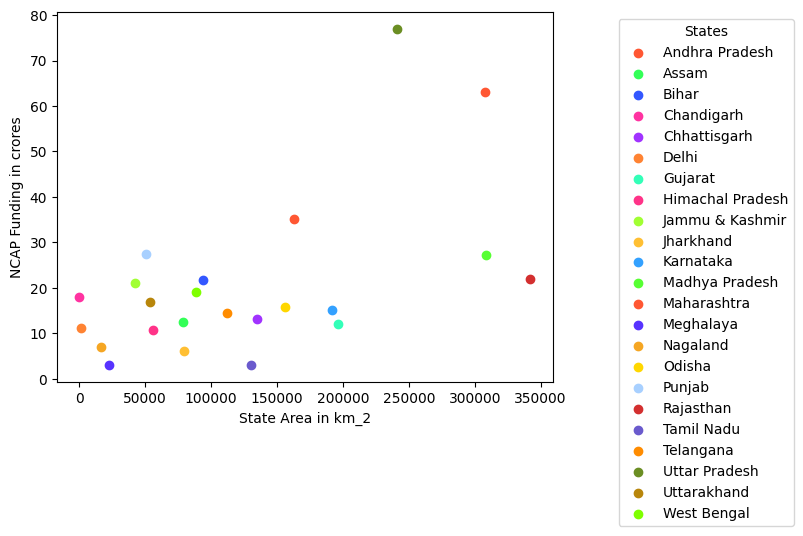

In [ ]:
flt = state['State'].isin(state_funds.index)
funds = ncap.groupby('State')['total'].sum()
state_colors = {
    'Andhra Pradesh': '#FF5733',
    'Assam': '#33FF57',
    'Bihar': '#3357FF',
    'Chandigarh': '#FF33A1',
    'Chhattisgarh': '#A133FF',
    'Delhi': '#FF8333',
    'Gujarat': '#33FFB8',
    'Himachal Pradesh': '#FF3388',
    'Jammu & Kashmir': '#A1FF33',
    'Jharkhand': '#FFBF33',
    'Karnataka': '#33A1FF',
    'Madhya Pradesh': '#57FF33',
    'Maharashtra': '#FF5733',
    'Meghalaya': '#5733FF',
    'Nagaland': '#F5A623',
    'Odisha': '#FFD700',
    'Punjab': '#A8D0FF',
    'Rajasthan': '#D32F2F',
    'Tamil Nadu': '#6A5ACD',
    'Telangana': '#FF8C00',
    'Uttar Pradesh': '#6B8E23',
    'Uttarakhand': '#B8860B',
    'West Bengal': '#7FFF00'
}
for st,color in state_colors.items():
  # if st not in state[flt]['State']:
  #   continue
  area = state.loc[(state['State'] == st),'area_km2']
  fund = funds[st]
  plt.scatter(area,fund,c=color,label=st)
plt.legend(bbox_to_anchor=(1.5,1),title='States')
plt.xlabel('State Area in km_2')
plt.ylabel('NCAP Funding in crores')

# **Miscellaneous Questions**

1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [ ]:
pol = data.groupby('City')['PM2.5'].mean()
city = pol[pol==pol.max()].index[0]

flt = data['City']==city
(data[flt]['PM2.5'] > 300).value_counts(normalize=True)

,proportion
PM2.5,
False,0.99414
True,0.00586


2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

In [ ]:
delhi = data[data['City'] == 'Delhi'].reset_index().groupby('Timestamp')['PM2.5'].mean()
diwali = (delhi.index.month==10)|(delhi.index.month==11)
diwali = delhi[diwali]
nw_yr = ((delhi.index.month==1)&(delhi.index.day==1))|((delhi.index.month==12)&(delhi.index.day==21))
nw_yr = delhi[nw_yr]

In [ ]:
diwali_max = diwali.groupby(diwali.index.year).max()
# diwali[diwali[diwali == diwali_max[yr]].index]
fin_diwali_max = pd.concat([diwali[diwali[diwali == diwali_max[yr]].index] for yr in diwali_max.index])

<ipython-input-55-d12655798e33>:8: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(diwali[flt].index,diwali[flt],label=f"Diwali {i}")


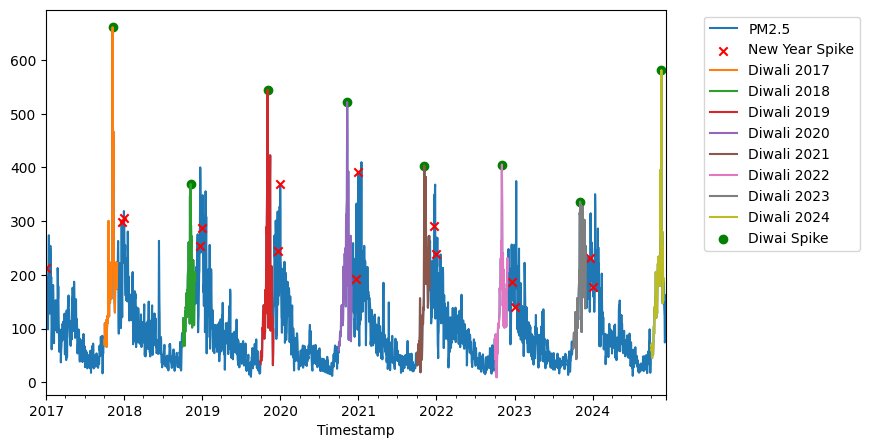

In [ ]:
plt.figure(figsize=(8,5))
# plt.scatter(nw_yr.index,nw_yr,c='red')
delhi.plot(kind='line',zorder=1)
plt.scatter(nw_yr.index,nw_yr,c='red',label='New Year Spike',zorder=2,marker='x')
diwali_yrs = diwali.index.year.unique()
for i in diwali_yrs:
  flt = (diwali.index.year==i)
  plt.plot(diwali[flt].index,diwali[flt],label=f"Diwali {i}")
plt.scatter(fin_diwali_max.index,fin_diwali_max,c='g',label='Diwai Spike')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

<Axes: >

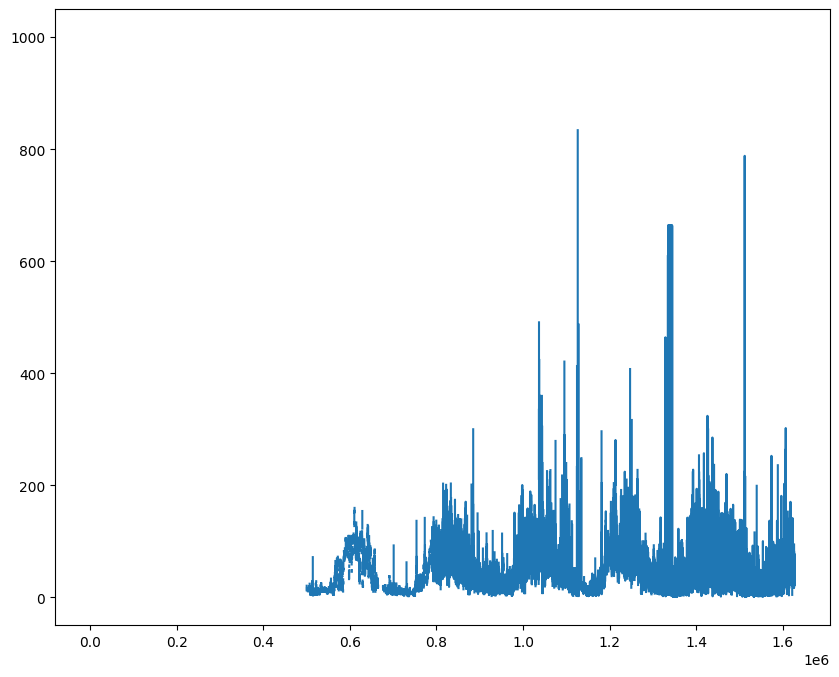

In [ ]:
ncap.loc[ncap['20'] == ncap['20'].max()].at[48,'State']
flt = (data['State']==ncap.loc[ncap['20'] == ncap['20'].max()].at[48,'State'])
fig, ax = plt.subplots(figsize=(10,8))
data[flt]['PM2.5'].plot(ax=ax,kind='line')

4. Draw the map of India and plot the sensor locations on the map.

In [ ]:
!pip install geodatasets

In [ ]:
import geopandas as gpd
import geodatasets as gd

In [ ]:
india = gpd.read_file('india_India_Country_Boundary.shp')

In [ ]:
lat = df['Latitude']
lon = df['Longitude']

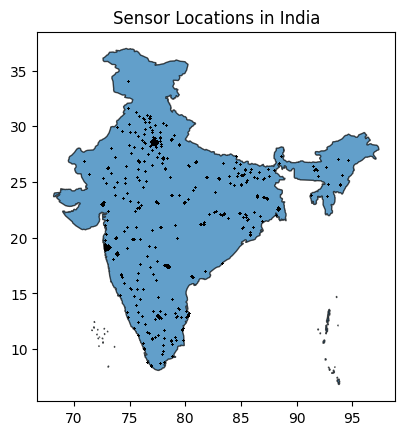

<Figure size 4000x5000 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
plt.figure(dpi=500,figsize=(8,10))
india.plot(ax=ax,edgecolor='black',alpha=0.7,)
ax.set_title("Sensor Locations in India")
ax.scatter(lon,lat,s=0.0001,c='k')

# **Tell us something new**

1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.